Consider the heat equation 
$$ u_t = u_{xx}$$ 
with boundary conditions 
$$ u(0,t) = u(1,t) $$ 
and 
$$u(x,0) = f(x) = \begin{cases} 2x &  x \le 1/2\\ 2(1-x) & x > 1/2 \end{cases}$$

Using Fourier's method, the exact solution can be shown to be 
$$
u(x,t) = \frac{8}{\pi^2} \sum_{k=1}^\infty \frac{\sin(k \pi /2)}{k^2} \exp(-(k\pi)^2t) \sin(k\pi x),
$$
which turns out to be well-approximated by 
$$
u(x,t) = \frac{8}{\pi^2} \sum_{k=1}^{100} \frac{\sin(k \pi /2)}{k^2} \exp(-(k\pi)^2t) \sin(k\pi x).
$$
This approximation will be the reference solution in these numerical tests.

We compare the reference solution to the explicit finite difference method
$$
\frac{v^{m+1}_j - v_{j}^m}{\Delta t} = \frac{v^{m}_{j-1} - 2v_{j}^m + v^m_{j+1}}{\Delta x^2}
$$
with $\Delta x = 1/100$ 
and $\Delta t = 1/M$ for the different values $M = 19000, 19970$ and $20000$.  

Note that the CFL condition 
$$
\frac{\Delta t}{\Delta x^2} \le \frac{1}{2},
$$
in this case only holds when $\Delta t \le \frac{1}{20000}$.

The tests below show that the numerical solution, for this particular problem, only is a good approximation of the reference solution when the CFL holds. 


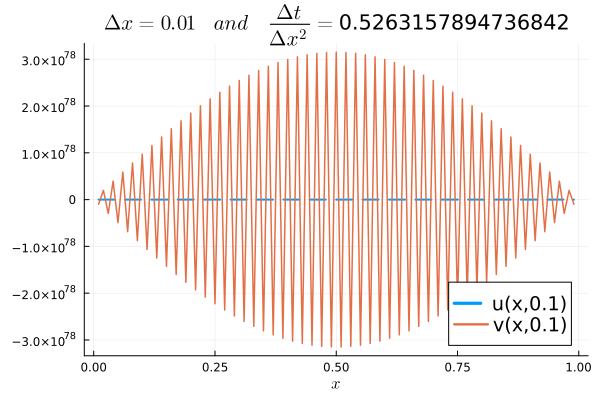

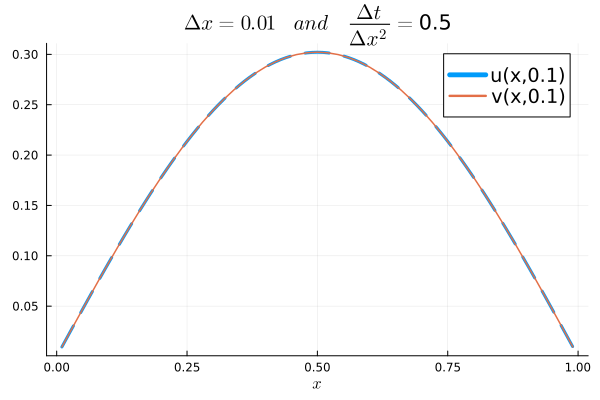

5.2631578947368424e-55.0075112669003505e-55.0e-5

In [14]:
# Reference solution 
#import Pkg
#Pkg.add("LaTeXStrings")
using LinearAlgebra
using Plots
using LaTeXStrings

function u(x,t)
    # returns reference solution vector for fixed t
    u_ref = zeros(size(x))
    for k =1:100
        u_ref = u_ref .+ (8/(k^2*pi^2))* sin(k*pi/2)* exp(-(k*pi)^2 *t) *sin.(k*pi*x)
    end
    return u_ref
end

# initial condition 
f(x) = (x≤0.5) .*2*x + 2*(x>0.5) .*(1-x)

# Numerical solver to time t =0.1 


function v(M, n)

    Δt = 1/M;
    print(Δt)
    Δx = 1/(n+1); x = (1:n)*Δx;
    subDiag = -ones(n-1); supDiag = subDiag;
    diag = 2*ones(n)
    A = LinearAlgebra.Tridiagonal(subDiag, diag, supDiag);

    #computing v^m, meaning v at time t=0.1
    m = M/10;
    v0 = f.(x);
    v = (I- (Δt/Δx^2)*A)^(m) *v0;
    
    return v;
end


# Plot of solutions at t =0.1:
n = 99; 
Δx = 1/(n+1); 
x = (1:n)*Δx
uRef = u.(x,0.1);

M = 19000; 
Δt = 1/M
vSol = v(M,n)
plt= plot(x,[uRef, vSol], label = ["u(x,0.1)" "v(x,0.1)"], lw = [2 1.5], ls = [:dash :solid], legendfontsize=13);
title!(L"\Delta x = 0.01 \quad and \quad \frac{\Delta t}{\Delta x^2} = "*string(Δt/Δx^2))
xlabel!(L"x")
display(plt)

M = 19970; 
Δt = 1/M
vSol = v(M,n)
plt= plot(x,[uRef, vSol], label = ["u(x,0.1)" "v(x,0.1)"], lw = 2, ls = [:dash :solid], legendfontsize=13);
title!(L"\Delta x = 0.01 \quad and \quad \frac{\Delta t}{\Delta x^2} = "*string(Δt/Δx^2))
xlabel!(L"x")
display(plt)


M = 20000; 
Δt = 1/M;
vSol = v(M,n);
plt= plot(x,[uRef, vSol], label = ["u(x,0.1)" "v(x,0.1)"], lw = [3 1.5], ls = [:dash :solid]);
title!(L"\Delta x = 0.01 \quad and \quad \frac{\Delta t}{\Delta x^2} = "*string(Δt/Δx^2), legendfontsize=13)
xlabel!(L"x");
display(plt);



For comparison, we also consider the following implicit scheme for solving the heat equation: 
$$
\frac{v^{m+1}_j - v_{j}^m}{\Delta t} = \frac{v^{m+1}_{j-1} - 2v_{j}^{m+1} + v^{m+1}_{j+1}}{\Delta x^2}
$$

Viewing $v^m$ as a vector in $\mathbb{R}^n$ and $A$ as our standard tridiagonal matrix, we can write the implicit scheme by
$$
v^{m+1} = (I + \frac{\Delta t}{\Delta x^2} A)^{-1} v^m.
$$

For resolutions, we still use $\Delta x = 1/100$, but now use $\Delta t = 1/M$ for the values $M = 10, 100$ and $200$, i.e., much larger time steps.  

Note that the CFL condition for the above scheme:  
$$
\frac{\Delta t}{\Delta x^2} \le \frac{1}{2},
$$
does not hold for any of our current  $\Delta t$ values. 


The tests below show that the numerical solution does not suffer from instability for any of the choices of $\Delta t$. This is because the implicit scheme is unconditionally Neumann stable!


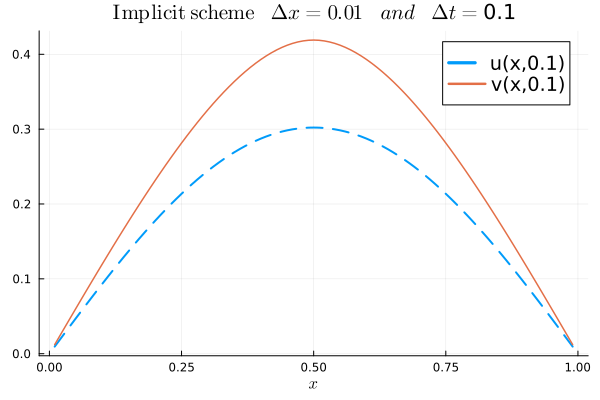

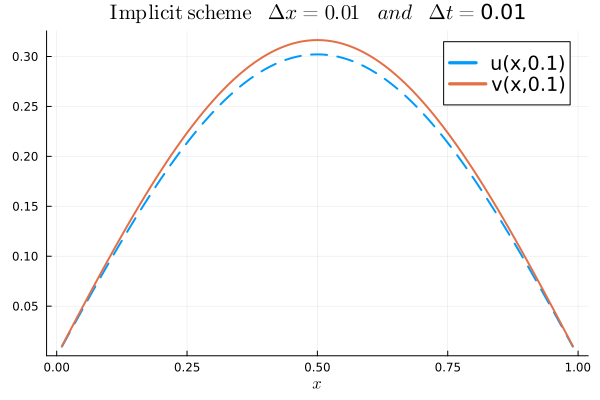

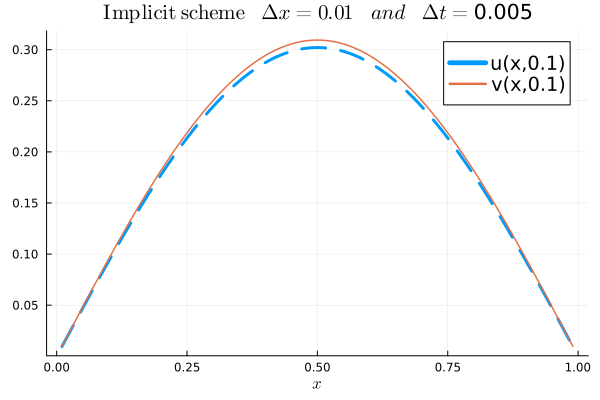

0.10.010.005

In [23]:
function vImplicit(M, n)

    Δt = 1/M;
    print(Δt)
    Δx = 1/(n+1); x = (1:n)*Δx;
    subDiag = -ones(n-1); supDiag = subDiag;
    diag = 2*ones(n)
    A = LinearAlgebra.Tridiagonal(subDiag, diag, supDiag);

    #computing v^m, meaning v at time t=0.1
    m = M/10;
    v0 = f.(x);
    v = (I + (Δt/Δx^2)*A)^(-m)*v0;
    
    return v;
end


# Plot of solutions at t =0.1:
n = 99; 
Δx = 1/(n+1); 
x = (1:n)*Δx
uRef = u.(x,0.1);

M = 10; 
Δt = 1/M
vSol = vImplicit(M,n)
plt= plot(x,[uRef, vSol], label = ["u(x,0.1)" "v(x,0.1)"], lw = [2 1.5], ls = [:dash :solid], legendfontsize=13);
title!(L"\mathrm{Implicit \; scheme} \quad \Delta x = 0.01 \quad and \quad \Delta t = "*string(Δt))
xlabel!(L"x")
display(plt)

M = 100; 
Δt = 1/M
vSol = vImplicit(M,n)
plt= plot(x,[uRef, vSol], label = ["u(x,0.1)" "v(x,0.1)"], lw = 2, ls = [:dash :solid], legendfontsize=13);
title!(L"\mathrm{Implicit \; scheme} \quad \Delta x = 0.01 \quad and \quad \Delta t = "*string(Δt))
xlabel!(L"x")
display(plt)


M = 200; 
Δt = 1/M;
vSol = vImplicit(M,n);
plt= plot(x,[uRef, vSol], label = ["u(x,0.1)" "v(x,0.1)"], lw = [3 1.5], ls = [:dash :solid]);
title!(L"\mathrm{Implicit \; scheme} \quad \Delta x = 0.01 \quad and \quad \Delta t = "*string(Δt), legendfontsize=13)
xlabel!(L"x");
display(plt);

